# Trabajo Práctico 1

## Columnas a utilizar

El primer paso que hicimos fue establecer una arquitectua de red de 3 capas donde ada una contaba con 128, 64 y 32 neuronas respectivamente.

Luego fuimos agregando a esa red una a una las columnas categóricas y midiendo el impacto de agregar cada columna. Por otro lado, las 2 columnas númericas disponibles (Age y Fee) se utilizaron siempre.

De estas pruebas obtuvimos el siguiente gŕafico en mlflow, donde el eje Y es el accuracy de evalaución y el eje X las columnas implicadas (se que no se ven todas, no hubo forma sencilla de incluir esos datos en el gráfico)

file:///home/franco/DiploDatos/DiploDatos/DeepLearning/imagenes/select_columns.png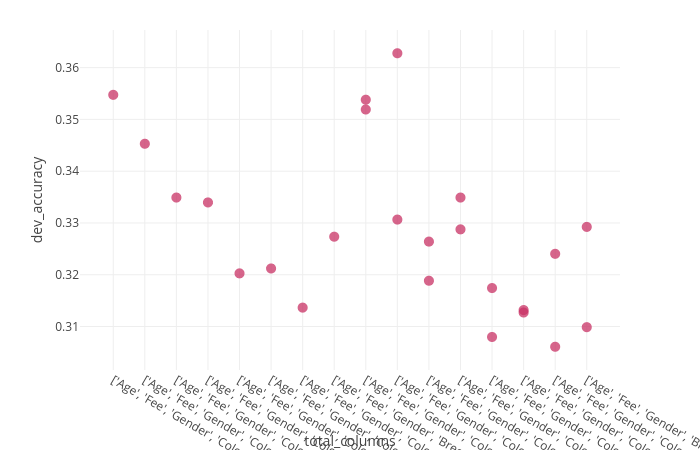

De estas pruebas determinamos que el conjunto de columnas más útil es con:
  * Age
  * Fee
  * Gender
  * Color1
  * MaturitySize
  * FurLength
  * Vaccinated
  * Dewormed
  * Sterilized
  * Health
  * Breed1


Lo ideal hubiese sido hacer más experimentos al agregar columnas, con al menos 5 inicializaciones de pesos diferentes con cada combinación. Esto es algo que si hicimos en la busqueda de hyperparametros para definir la red pero sobre un conjunto de columnas ya definido. De ahora en más todas las redes fueron probadas sobre este conjunto de columnas



## Determinando Hiper parámetros

En este punto hicimos una random search de 16 combinaciones diferentes de:
  * Cantidad de capas
  * Tamaño de las capas
  * Porcentaje de dropout

Por otro lado, todas las redes entrenadas utilizaron una inicialización uniforme de Glorot (o Xavier). Cada combinación de hiper parametros se corrió 5 veces con diferentes pesos de inicialización.

Los resultados obtenidos se ven en la siguiente imágen obtenida de mlflow
file:///home/franco/DiploDatos/DiploDatos/DeepLearning/imagenes/16_experiments.png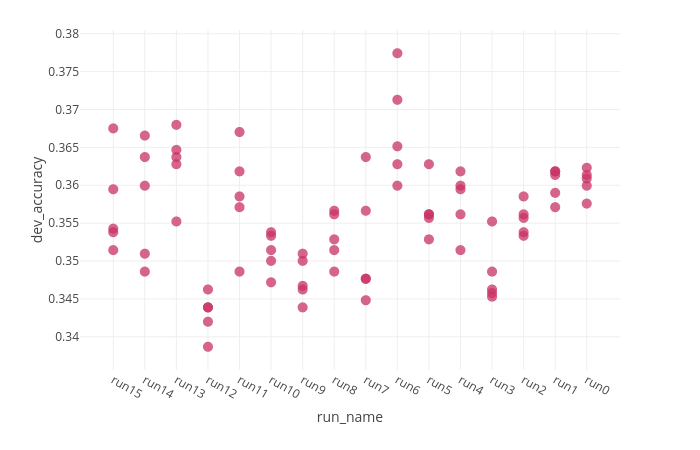


Los experimentos 6 y 13 parecen ser los más prometedores en cuanto a nivel de accuracy y disperción de los resultados. 

Nos pusimos a ver como evoluciono la loss de la red a lo largo de epochs

### Experimento 6

file:///home/franco/DiploDatos/DiploDatos/DeepLearning/imagenes/exp2_run6.png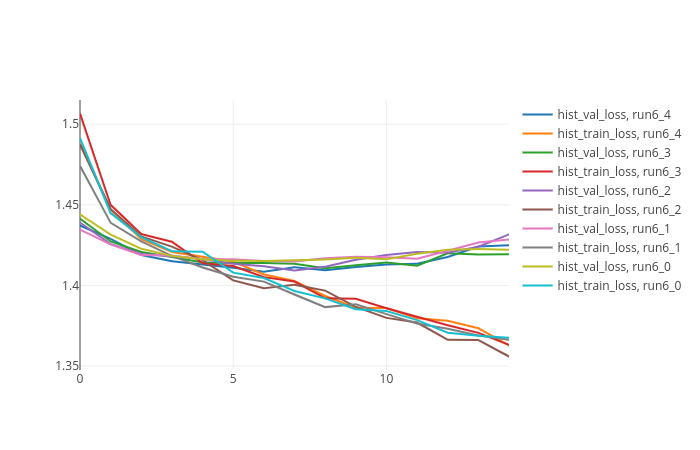

De el gráfico vemos que al entrenar durante tantas epochs el algoritmo comienza a overfitear ya que la loss de evalaucion comienza a crecer despues de alcanzar un mínimo y diverge de la de train.

Del gráfico vemos que utilizar algo entre 8 y 12 epochs parece estar bien

### Experimento 13

file:///home/franco/DiploDatos/DiploDatos/DeepLearning/imagenes/exp2_run13.png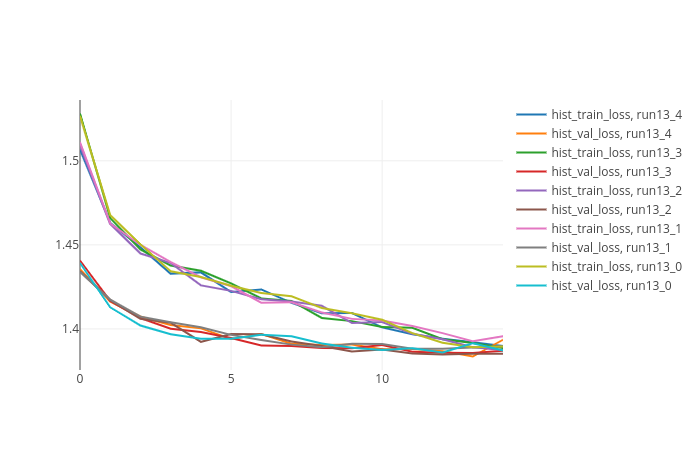

En este experimento, sucede que la loss de train se mantiene por arriba de la de evalución. Esto puede deberse a un porcentaje alto de dropout, que hace que la convergencia de la red sea más lenta. En particular esta arquitectura podría arrojar mejores resultados con más epocas

### Conclusiones de experimentos 6 y 13

Estos experimentos tiene en común que ambos son de 3 capas.

Exp 6 tiene:
  * Capas: 252, 109 y 55 neuronas
  * Dropout: 0.38, 0.44 y 0.37

Exp 13 tiene:
  * Capas: 192, 52 y 40
  * Dropout: 0.41, 0.47 y 0.35



### Más pruebas...

Observando que el número de capas 3 parecía ser de lo mejor y que aquellas redes que empezaban con una capa de neuronas relativamente grande (~200 o más) presentan también buenos resultados se hicieron algunas corridas extras respetando estos puntos y además agregando algunas epocas a la corrida 13 para ver si mejoraba. Obtuvimos lo siguiente

file:///home/franco/DiploDatos/DiploDatos/DeepLearning/imagenes/exp3_all_dot.png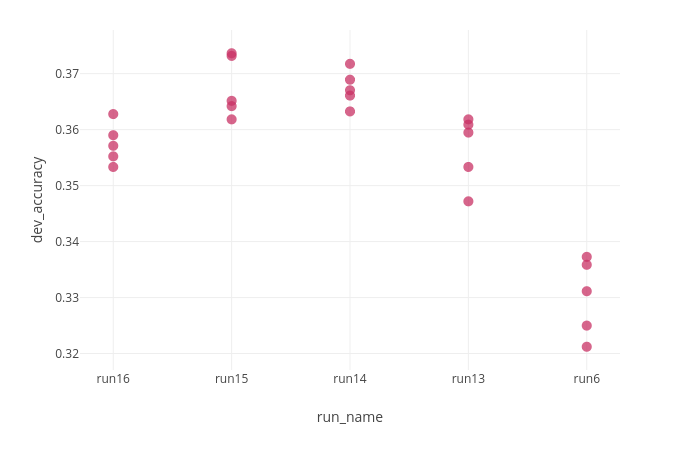

Vemos como al agregar más epocas ahora la corrida 13 mejora respecto a las 6. 

**¿Podría haber pasado esto con otras corridas descartadas?**

  **Probablemente si**, por lo que necesitarían hacerse nuevas corridas. 

**¿Pero como garantizo un buen número de epocas?**

Utilizando algún mecanismo de **early stopping** y poniendo muchas epocas. ([mas info aca](https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/))



En particular las corridas que ahora presentan mejores resultados tienen la siguiente características

Exp 14 tiene:
  * Capas: 192, 52 y 30
  * Dropout: 0.41, 0.47 y 0.40
  
Exp 15 tiene:
  * Capas: 164, 64 y 16 neuronas
  * Dropout: 0.45, 0.43 y 0.4


## Arquitectura de la mejor red

file:///home/franco/DiploDatos/DiploDatos/DeepLearning/imagenes/model.png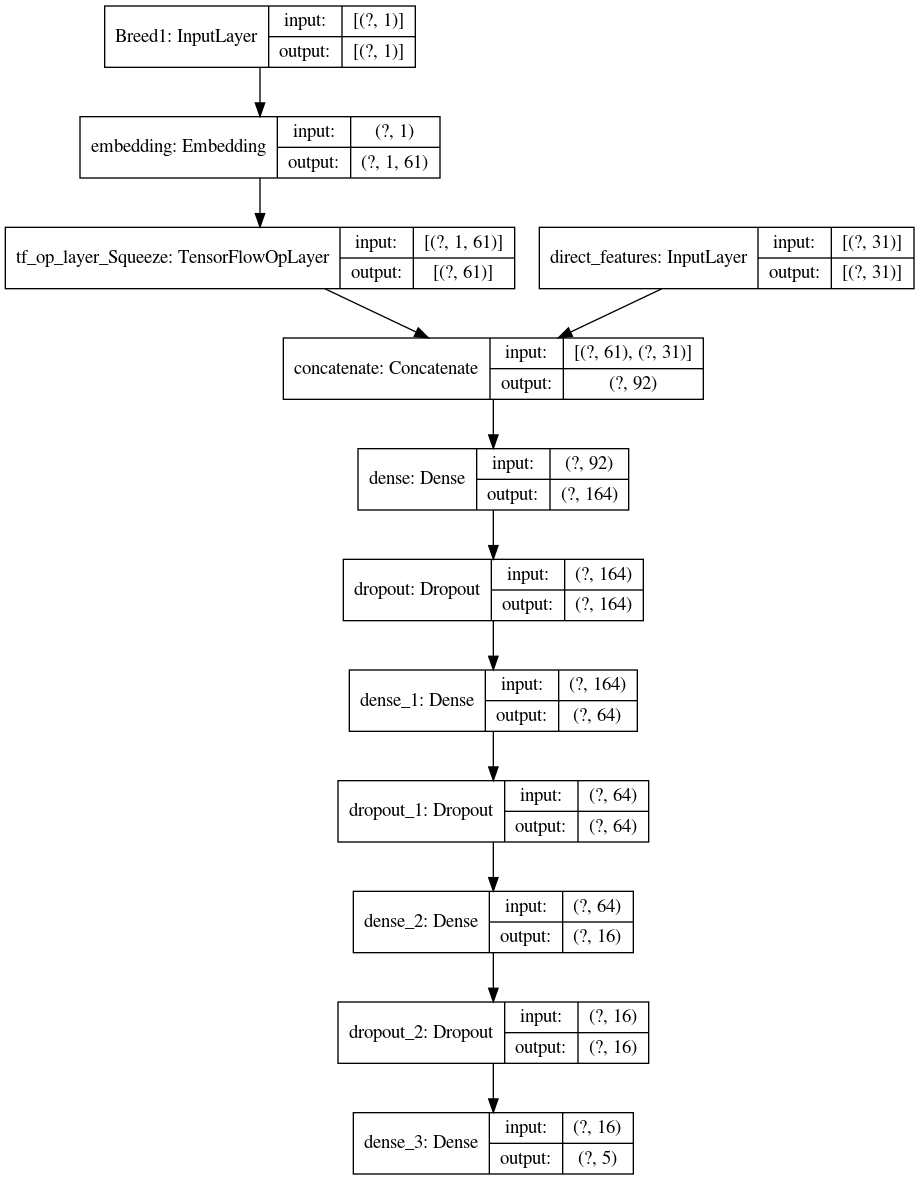

# Trabajo Practico 2

En el trabajo práctico 2, agregamos una red neuronal compleja a lo que ya teníamos e hicimos un random search de nuevo

La red convolucional se va a encargar de procesar los datos en forma de texto que vienen en la columna **description**. Para ello hubo que aplicar ciertos procedimientos propios de NLP a esa misma columna. 

## Problemas con partición train/validation 

Durante el desarrollo de este práctico encontramos problema en la forma de particionar los datos en train/validation propuesta en el notebook que plantea el trabajo practico.

Vimos que al usar genedarores de python en convinacion con el shuffle de keras y seguido de la partición causa que los datos de validación se vean durante el entrenamiento, haciendo que la red presente un accuracy de train y validación muy altos, pero no así en el test de kaggle.

## Random Search

Hicimos una bsuqueda random de hiper parametros. En este caso si utilizamos Early Stopping para detener el entrenamiento cuando la loss de validación comenzaba a diverger. Utilizamos 50 epochs para todos los modelos

Los resultados obtenidos fueron



file:///home/franco/DiploDatos/DiploDatos/DeepLearning/imagenes/rnd_search_tp02.png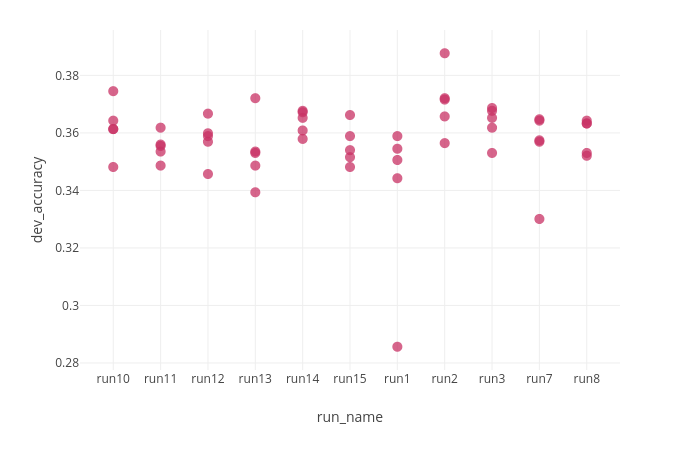

Las corridas 2 y 3 parecen las mejoras, junto tal vez con la 14 también.

### Experimento 2

Aca se puede ver la loss a travez de las diferentes epochs. Se puede apreciar el efecto del early stopping, cuando la loss de validación empieza a crecer, el proceso de entranmiento finaliza

file:///home/franco/DiploDatos/DiploDatos/DeepLearning/imagenes/tp02_run2_es.png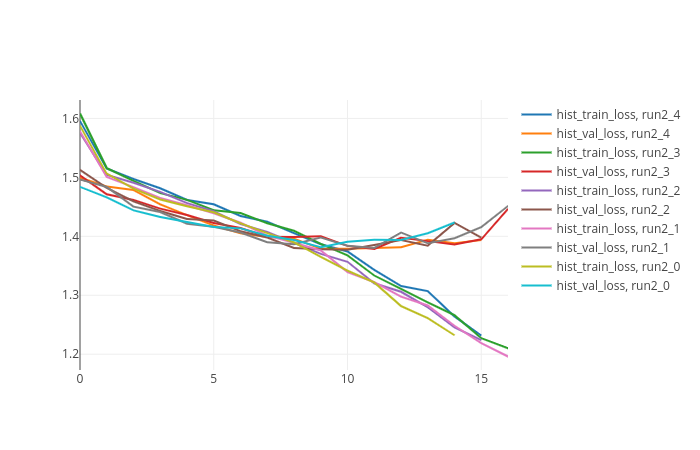

En particular esta corrida, vuelve a utulizar 3 capas, de con una progresión de neuronas similar a lo que dio mejor en el TP01

  * Capas: 226, 69 y 41 neuronas
  * Dropout: 0.37, 0.39 y 0.47
  * CNN Filter width: 6 y 4
  * CNN Filter count: 48
  

### Experimento 3

file:///home/franco/DiploDatos/DiploDatos/DeepLearning/imagenes/tp02_run3_es.png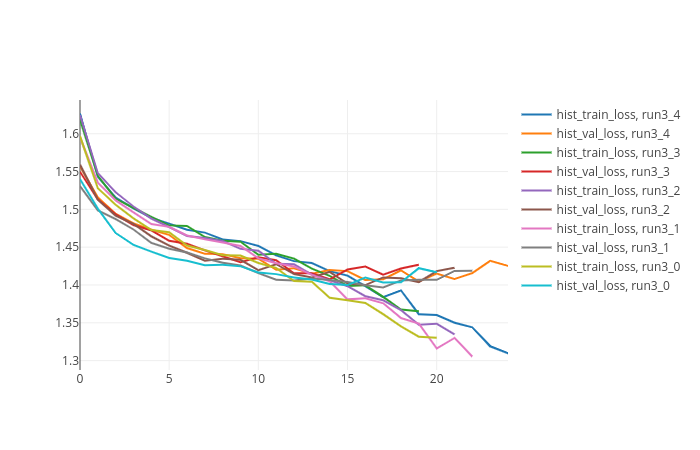

En este caso se utilizan 4 capas con las siguientes configuraciones

  * Capas: 233, 38, 25 y 21 neuronas
  * Dropout: 0.46, 0.39, 0.41 y 0.46
  * CNN Filter width: 6 y 5
  * CNN Filter count: 16

La reduccion de la primer a la segunda capa parece ser muy grande, por lo que se podria probar con una reduccion mas progresiva y ver que da

### Arquitectura

La arquitectura de la red queda algo similar a lo que se puede ver en el a siguiente figura

file:///home/franco/DiploDatos/DiploDatos/DeepLearning/imagenes/model_cnn.png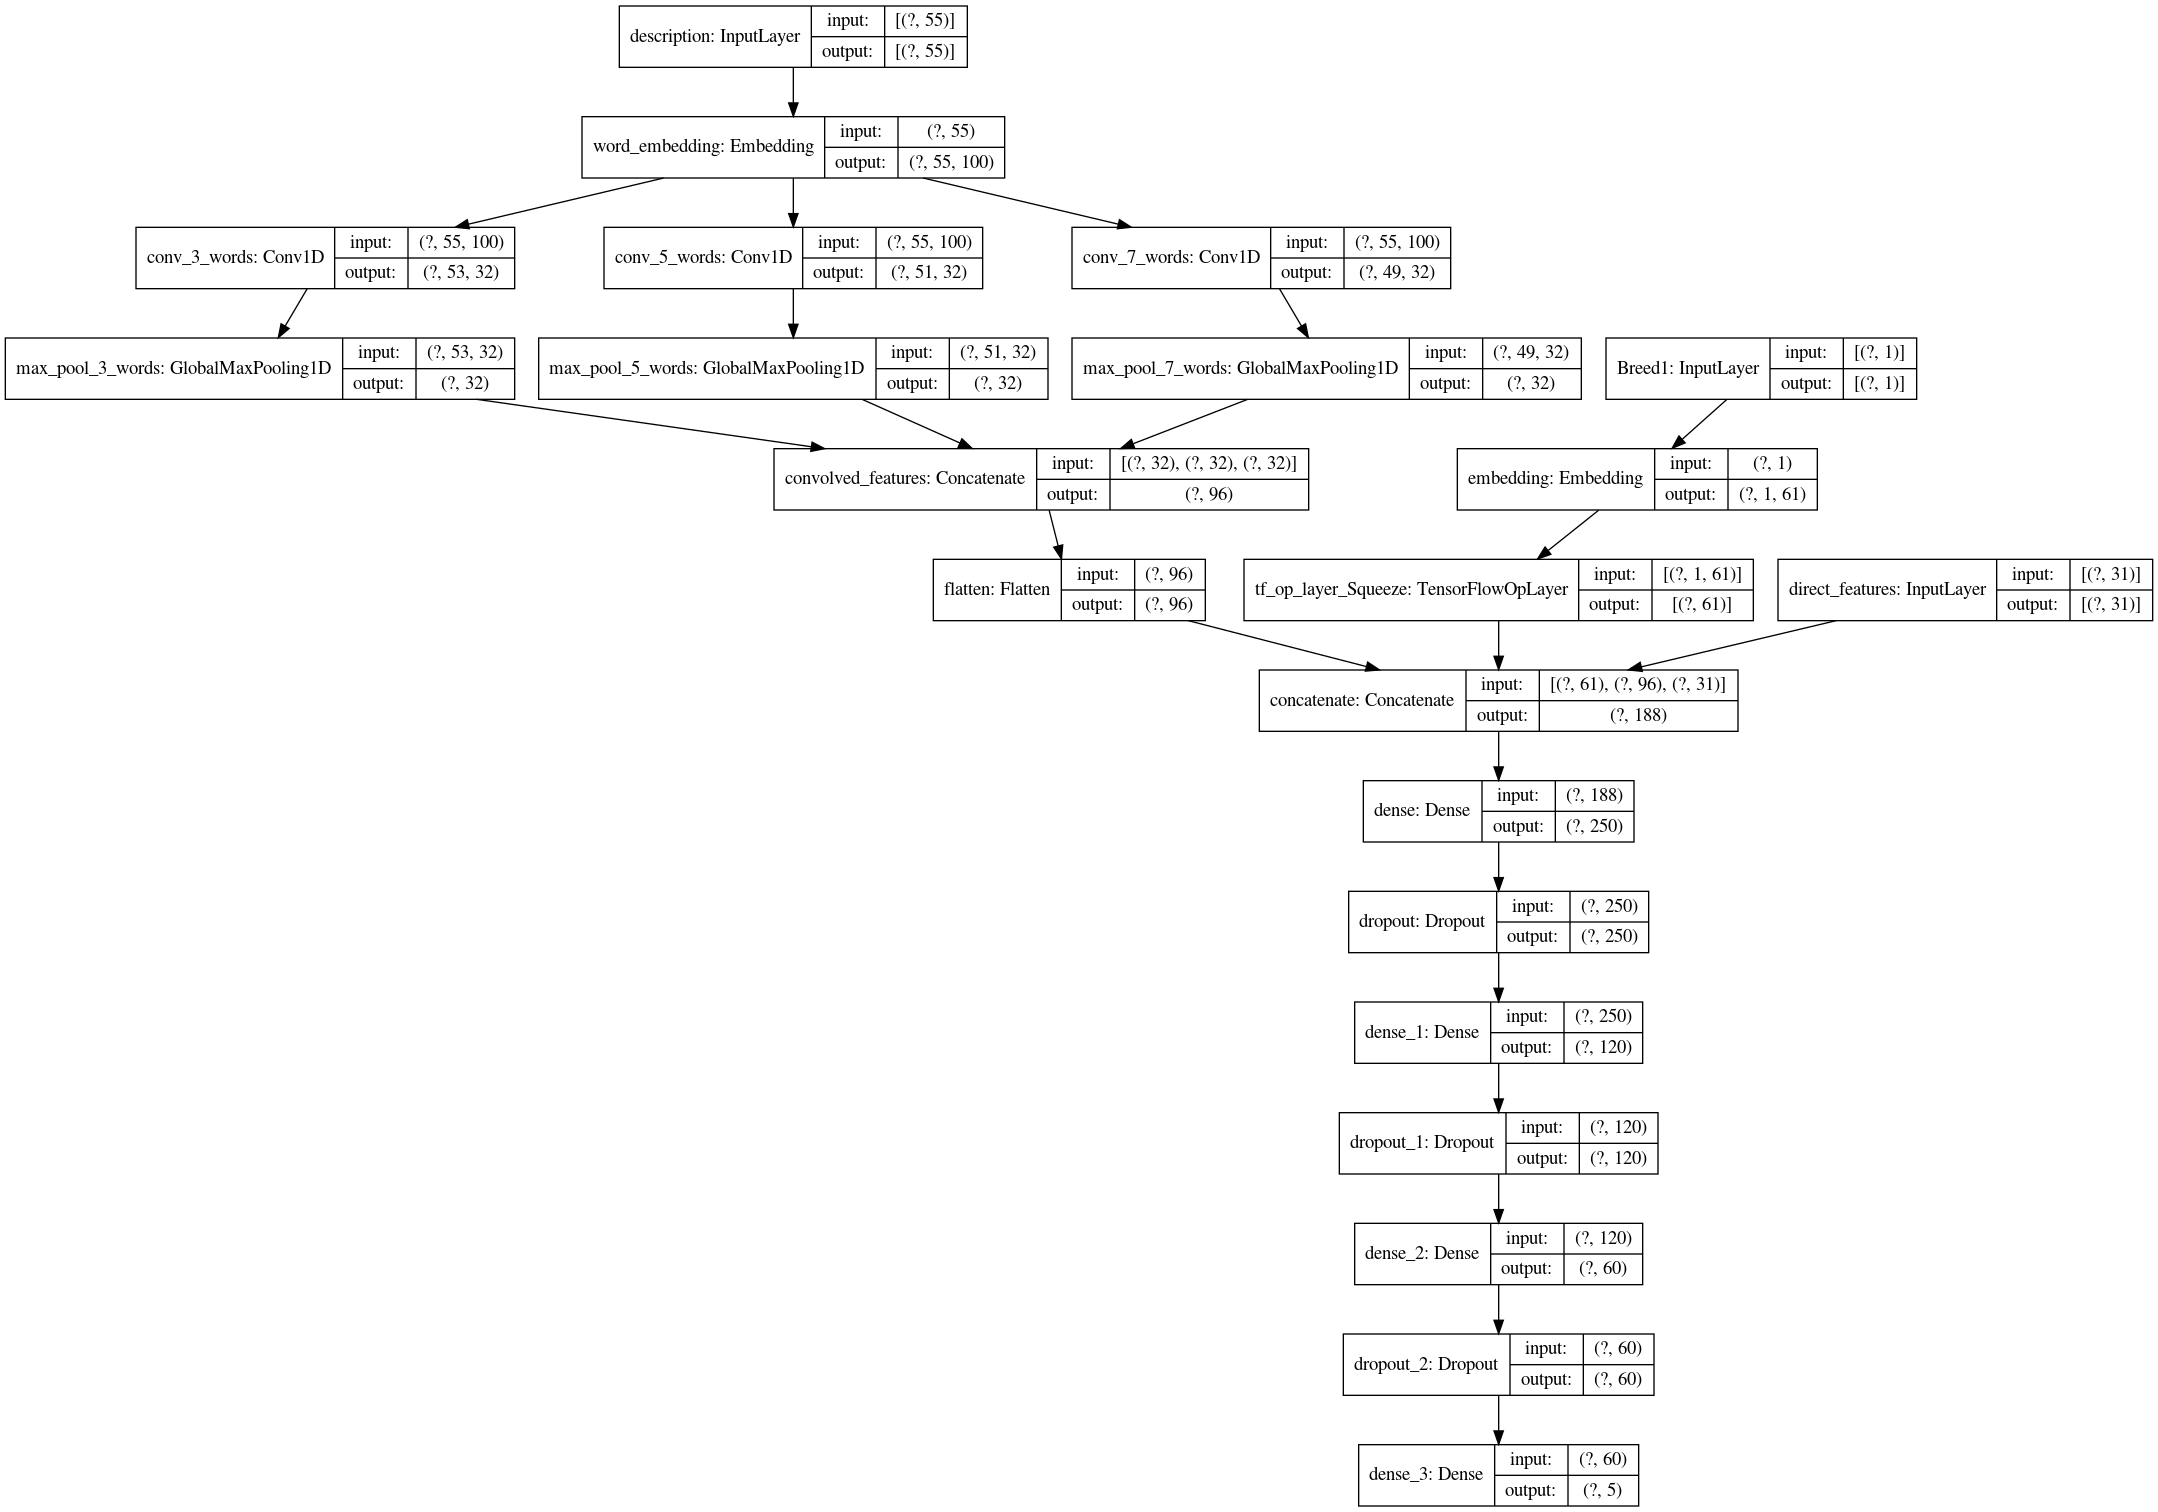

## Conclusion

Agregar las redes convloucional no parece haber mejorado notablemente el desempeño de la red. Probalbemente con una bsuqueda random de hiper parametros mas extensa se encuentren mejores resultados ya que aqui solo se probaron 16 combinaciones posibles.